In [1]:
import pandas as pd
import numpy as np

np.random.seed(1234)

df = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 100),
    'feature2': np.random.normal(50, 20, 100),
    'target': np.random.choice([0, 1], size=100)
})

df.head()

,feature1,feature2,target
0,0.471435,55.824107,0
1,-1.190976,61.330674,1
2,1.432707,60.071835,0
3,-0.312652,55.705914,1
4,-0.720589,59.685762,1


In [2]:
X = df[['feature1', 'feature2']]
y = df['target']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

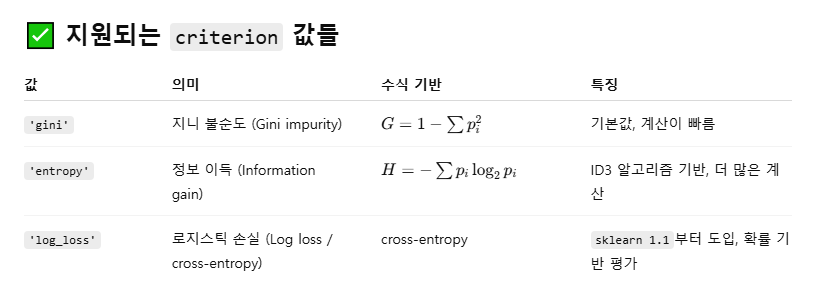

In [4]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
model = DecisionTreeClassifier(random_state=1234, max_depth=2, criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [5]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [6]:
# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))

# pos_label=1 => 1이 양성 클래스라고 간주 (default)
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

Accuracy : 0.55
Recall : 0.7272727272727273
Precision : 0.5714285714285714
F1 Score: 0.64


In [14]:
# 지니 불순도 감소량
tree_ = model.tree_

# 노드 정보
root_node = 0
left_child = tree_.children_left[root_node]
right_child = tree_.children_right[root_node]

# 노드별 impurity
impurity_root = tree_.impurity[root_node]
impurity_left = tree_.impurity[left_child]
impurity_right = tree_.impurity[right_child]

# 노드별 sample 수
n_root = tree_.n_node_samples[root_node]
n_left = tree_.n_node_samples[left_child]
n_right = tree_.n_node_samples[right_child]

# 지니 불순도 감소량 계산
weighted_impurity = (n_left / n_root) * impurity_left + (n_right / n_root) * impurity_right
gini_decrease = impurity_root - weighted_impurity

# 출력
print(f"Root impurity: {impurity_root:.4f}")
print(f"Left impurity: {impurity_left:.4f}, samples: {n_left}")
print(f"Right impurity: {impurity_right:.4f}, samples: {n_right}")
print(f"Impurity decrease after split: {gini_decrease:.4f}")

Root impurity: 0.9837
Left impurity: 0.0000, samples: 6
Right impurity: 0.9953, samples: 74
Impurity decrease after split: 0.0631


In [15]:
for i in range(model.tree_.node_count):
    print(model.tree_.value[i], model.tree_.impurity[i])

[[46. 34.]] 0.9837082626231857
[[6. 0.]] 0.0
[[40. 34.]] 0.9952525494396791
[[32. 33.]] 0.9998292601233936
[[8. 1.]] 0.5032583347756457


In [8]:
df_tmp = df.copy()
X_col = ['feature1', 'feature2']
y_col = ['target']

# 부스팅
# 오류 데이터에 더 큰 가중치를 부여하여 다시 샘플링을 실시
# train1 = train0 + (예측값 != 실제값) 데이터 추가

model0 = model

# 3번 부스팅
for i in range(4):
    # index reset
    df_tmp.index = range(df_tmp.shape[0])
    globals()['model{}'.format(i)] = DecisionTreeClassifier(random_state=1234, max_depth=2, criterion="entropy")
    globals()['model{}'.format(i)].fit(df_tmp[X_col], df_tmp[y_col])
    
    y_test = df_tmp[y_col]
    y_pred = globals()['model{}'.format(i)].predict(df_tmp[X_col])
    
    print("Boosting :", i)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Recall :", recall_score(y_test, y_pred))
    print("Precision :", precision_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
        
    df_tmp2 = df_tmp[np.array(y_test['target']) != y_pred]
    # print(df_tmp.shape, df_tmp2.shape, len(np.array(y_test) != y_pred))
    df_tmp = pd.concat([df_tmp, df_tmp2], axis=0)
    print()



Boosting : 0
Accuracy : 0.58
Recall : 0.06666666666666667
Precision : 1.0
F1 Score: 0.125

Boosting : 1
Accuracy : 0.676056338028169
Recall : 0.9310344827586207
Precision : 0.6694214876033058
F1 Score: 0.7788461538461537

Boosting : 2
Accuracy : 0.526595744680851
Recall : 0.043010752688172046
Precision : 1.0
F1 Score: 0.08247422680412372

Boosting : 3
Accuracy : 0.6750902527075813
Recall : 1.0
Precision : 0.6691176470588235
F1 Score: 0.801762114537445

